In [1]:
import os 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers, optimizers, datasets 
from matplotlib import pyplot as plt 
import numpy as np 
 
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()   
 
print(y_train_raw[0]) 
print(x_train_raw.shape, y_train_raw.shape) 
print(x_test_raw.shape, y_test_raw.shape) 
 
#Convert the labels into one-hot codes. 
num_classes = 10 
y_train = keras.utils.to_categorical(y_train_raw, num_classes) 
y_test = keras.utils.to_categorical(y_test_raw, num_classes) 
print(y_train[0]) 

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


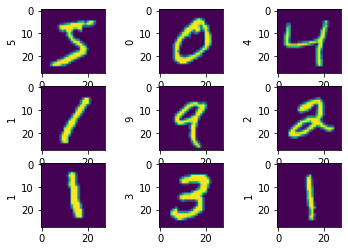

In [2]:
plt.figure() 
for i in range(9): 
        plt.subplot(3,3,i+1) 
        plt.imshow(x_train_raw[i]) 
        plt.ylabel(y_train_raw[i]) 
        plt.axis('on') 
plt.show() 

In [3]:
'''
#Convert a 28 x 28 image into a 784 x 1 vector. 
x_train_ = x_train_raw.reshape(60000, 784) 
x_test_ = x_test_raw.reshape(10000, 784)
#Normalize image pixel values. 
x_train = x_train_.astype('float32')/255 
x_test = x_test_.astype('float32')/255
'''

"\n#Convert a 28 x 28 image into a 784 x 1 vector. \nx_train_ = x_train_raw.reshape(60000, 784) \nx_test_ = x_test_raw.reshape(10000, 784)\n#Normalize image pixel values. \nx_train = x_train_.astype('float32')/255 \nx_test = x_test_.astype('float32')/255\n"

In [4]:
#Normalize image pixel values. 
x_train = x_train_raw.astype('float32')/255 
x_test = x_test_raw.astype('float32')/255

In [5]:
#print(x_train[0])

In [6]:
'''
#Create a deep neural network (DNN) model that consists of three fully connected layers and two RELU activation functions. 

model = keras.Sequential([   
        layers.Dense(16, activation='relu', input_dim = 784), 
        layers.Dense(14, activation='relu'), 
        layers.Dense(12, activation='relu'), 
layers.Dense(num_classes, activation='softmax')]) 
 
model.summary()
''' 

"\n#Create a deep neural network (DNN) model that consists of three fully connected layers and two RELU activation functions. \n\nmodel = keras.Sequential([   \n        layers.Dense(16, activation='relu', input_dim = 784), \n        layers.Dense(14, activation='relu'), \n        layers.Dense(12, activation='relu'), \nlayers.Dense(num_classes, activation='softmax')]) \n \nmodel.summary()\n"

In [7]:
#Create a deep neural network (CNN) model that consists of three fully connected layers and two RELU activation functions.

model=keras.Sequential() #Create a network sequence. 

##Add the first convolutional layer and pooling layer. 
model.add(keras.layers.Conv2D(filters=32, kernel_size = 5,strides = (1,1), 
                              padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1))) 
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid')) 

##Add the second convolutional layer and pooling layer. 
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu)) 
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid')) 

##Add a dropout layer to reduce overfitting. 
model.add(keras.layers.Dropout(0.25)) 

model.add(keras.layers.Flatten()) 

##Add two fully connected layers. 
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu)) 

model.add(keras.layers.Dropout(0.5)) 

model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax)) 

In [8]:
model.summary()
Optimizer = optimizers.Adam() 
model.compile(loss=keras.losses.categorical_crossentropy, 
                            optimizer=Optimizer, 
                            metrics=['accuracy']) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [9]:
#Fit the training data to the model by using the fit method. 
train_model= model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=10, 
                    verbose=1,
                    validation_split=0.10)

Epoch 1/10
422/422 [==============================] - 6s 8ms/step - loss: 0.3096 - accuracy: 0.9029 - val_loss: 0.0547 - val_accuracy: 0.9850
Epoch 2/10
422/422 [==============================] - 4s 8ms/step - loss: 0.0974 - accuracy: 0.9720 - val_loss: 0.0396 - val_accuracy: 0.9890
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0715 - accuracy: 0.9781 - val_loss: 0.0366 - val_accuracy: 0.9907
Epoch 4/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 5/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0506 - accuracy: 0.9850 - val_loss: 0.0328 - val_accuracy: 0.9907
Epoch 6/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0292 - val_accuracy: 0.9922
Epoch 7/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0415 - accuracy: 0.9867 - val_loss: 0.0335 - val_accuracy: 0.9910
Epoch 

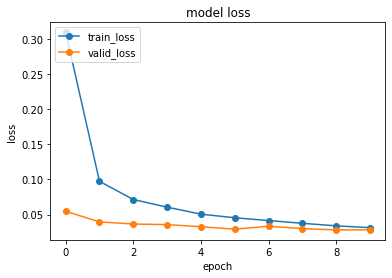

In [10]:
train_loss = train_model.history['loss']
valid_loss = train_model.history['val_loss']
plt.plot(train_loss,'-o')
plt.plot(valid_loss,'-o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'valid_loss'], loc='upper left')
plt.show()

In [11]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.026064883917570114
Test accuracy: 0.9919999837875366


In [12]:
#model.save('./model/final_DNN_model.h5') 
model.save('./model/final_CNN_model.h5') 

In [13]:
from tensorflow.keras.models import load_model 
new_model = load_model('./model/final_CNN_model.h5') 
new_model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

**try to print class value for prediction results of the first 20 images:(number for test image) ???**

prediction results of the first 20 images:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
first 20 images in the test set:


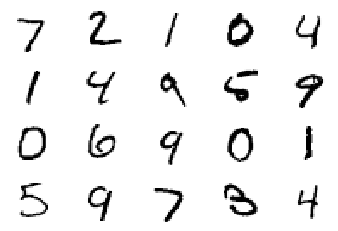

In [14]:
#Visualize test set output results. 
import matplotlib.pyplot as plt 
%matplotlib inline 
def res_Visual(n): 
        final_opt_a=new_model.predict(x_test[0:n]) #Perform predictions on the test set by using the model. 
        #predict_x=model.predict(x_test[0:n]) 
        #classes_x=np.argmax(predict_x,axis=1)
        fig, ax = plt.subplots(nrows=int(n/5),ncols=5 ) 
        ax = ax.flatten() 
        print('prediction results of the first {} images:'.format(n)) 
        for i in range(n): 
                print(np.argmax(final_opt_a[i]),end=',') 
                if int((i+1)%5) ==0: 
                        print('\t') 
                #Visualize image display. 
                img = x_test[i].reshape((28,28))#Read each row of data in the format of Ndarry. 
                plt.axis("off") 
                ax[i].imshow(img, cmap='Greys', interpolation='nearest') #Visualization 
                ax[i].axis("off") 
        print('first {} images in the test set:'.format(n)) 
res_Visual(20) 